File exists: True 
Path: C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\ml_base.csv
Rows x Cols: (12, 10)


,site,baseline_cover,recovery_year,depth,wave,nutrient,coral_juv,init_cover,herb,complex
0,Mahe E Patch,19.1875,17,15.387053,15.495849,19.707402,18.882503,13.552108,14.881658,15.822302
1,Mahe NW Carbonate,38.8750,13,15.476129,15.571927,16.348364,18.615426,13.831565,15.023233,15.862896
2,Mahe NW Granite,10.7500,3,15.565204,15.648004,12.989327,18.348349,14.111022,15.164808,15.903491
3,Mahe NW Patch,17.2500,6,15.654280,15.724082,NaN,18.081271,14.390479,15.306382,15.944085
4,Mahe W Carbonate,34.2500,11,15.743355,15.800159,NaN,17.814194,14.669936,15.447957,15.984680


RMSE per fold: [ 4.26   7.512  2.824 11.236  1.218  4.908  6.628  0.442  2.248  2.72
  1.182 13.206]
Mean RMSE: 4.865333333333333


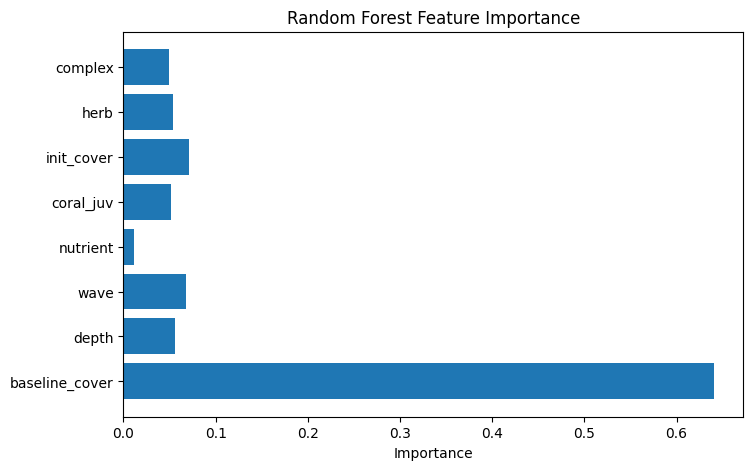

In [6]:
%matplotlib inline
import os, sys, pandas as pd
from pathlib import Path

p = Path(r"C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\ml_base.csv")
print("File exists:", p.exists(), "\nPath:", p)

if p.exists():
    df = pd.read_csv(p)
    print("Rows x Cols:", df.shape)
    display(df.head())
else:
    raise FileNotFoundError("Check the path above.")

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# 1) Load your dataset
df = pd.read_csv(r"C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\ml_base.csv")

# 2) Features and target
X = df.drop(columns=["site", "recovery_year"])
y = df["recovery_year"]
groups = df["site"]

# 3) Pipeline: impute missing values + random forest
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("rf", RandomForestRegressor(n_estimators=500, random_state=42))
])

# 4) Grouped cross-validation (leave-one-site-out style)
cv = GroupKFold(n_splits=len(groups.unique()))

scores = cross_val_score(pipe, X, y, cv=cv, scoring="neg_root_mean_squared_error", groups=groups)
print("RMSE per fold:", -scores)
print("Mean RMSE:", -scores.mean())

# 5) Fit on full data to get feature importances
pipe.fit(X, y)
importances = pipe.named_steps["rf"].feature_importances_

# 6) Plot feature importance
plt.figure(figsize=(8,5))
plt.barh(X.columns, importances)
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()


Loading: C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\ml_base.csv
Rows x Cols: (12, 10)


,site,baseline_cover,recovery_year,depth,wave,nutrient,coral_juv,init_cover,herb,complex
0,Mahe E Patch,19.1875,17,15.387053,15.495849,19.707402,18.882503,13.552108,14.881658,15.822302
1,Mahe NW Carbonate,38.8750,13,15.476129,15.571927,16.348364,18.615426,13.831565,15.023233,15.862896
2,Mahe NW Granite,10.7500,3,15.565204,15.648004,12.989327,18.348349,14.111022,15.164808,15.903491
3,Mahe NW Patch,17.2500,6,15.654280,15.724082,NaN,18.081271,14.390479,15.306382,15.944085
4,Mahe W Carbonate,34.2500,11,15.743355,15.800159,NaN,17.814194,14.669936,15.447957,15.984680


RMSE per site:
                   site    rmse
7     Mahe W Carbonate   0.442
10   Mahe NW Carbonate   1.182
4   Praslin NE Granite   1.218
8        Mahe NW Patch   2.248
9      Mahe NW Granite   2.720
2   Praslin SW Granite   2.824
0       Ste Anne Patch   4.260
5         Mahe W Patch   4.908
6       Mahe W Granite   6.628
1     Ste Anne Granite   7.512
3     Praslin NE Patch  11.236
11        Mahe E Patch  13.206
Mean RMSE: 4.865


,feature,importance
0,baseline_cover,0.640519
5,init_cover,0.071167
2,wave,0.067803
1,depth,0.055816
6,herb,0.053442
4,coral_juv,0.051067
7,complex,0.049048
3,nutrient,0.011138


Saved CSVs:
 - C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\rmse_results.csv
 - C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\feature_importances.csv
 - C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\pred_vs_actual.csv


UFuncTypeError: ufunc 'greater_equal' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

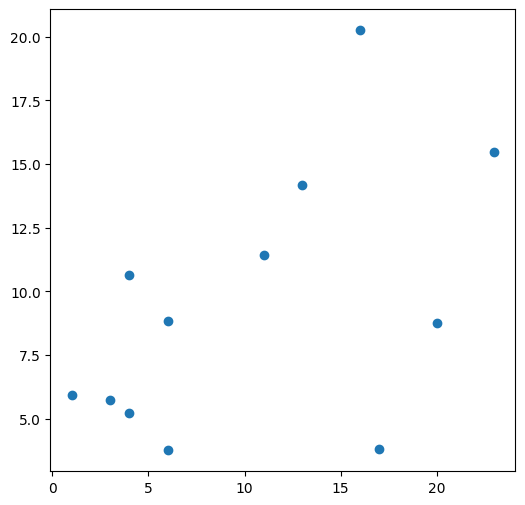

In [3]:
# --- SELF-CONTAINED EXPORT CELL ---
%matplotlib inline
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from joblib import dump

# 0) Paths
outdir = r"C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports"
data_path = os.path.join(outdir, "ml_base.csv")
assert os.path.exists(data_path), f"ml_base.csv not found at:\n{data_path}"

print("Loading:", data_path)
df = pd.read_csv(data_path)
print("Rows x Cols:", df.shape)
display(df.head())

# 1) Define features/target/groups fresh (don’t rely on previous cells)
X = df.drop(columns=["site", "recovery_year"])
y = df["recovery_year"]
groups = df["site"]

# 2) Pipeline and grouped CV
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("rf", RandomForestRegressor(n_estimators=500, random_state=42))
])

gkf = GroupKFold(n_splits=groups.nunique())
rmse_rows, oof_pred = [], pd.Series(index=df.index, dtype=float)

for tr, te in gkf.split(X, y, groups):
    pipe.fit(X.iloc[tr], y.iloc[tr])
    pred = pipe.predict(X.iloc[te])
    rmse = float(np.sqrt(np.mean((pred - y.iloc[te])**2)))
    site_name = groups.iloc[te].iloc[0]
    rmse_rows.append({"site": site_name, "rmse": rmse})
    oof_pred.iloc[te] = pred

rmse_df = pd.DataFrame(rmse_rows).sort_values("rmse")
rmse_mean = rmse_df["rmse"].mean()
print("RMSE per site:\n", rmse_df)
print("Mean RMSE:", round(rmse_mean, 3))

# 3) Fit on full data for importances
pipe.fit(X, y)
importances = pipe.named_steps["rf"].feature_importances_
feat_df = pd.DataFrame({"feature": X.columns, "importance": importances}).sort_values("importance", ascending=False)
display(feat_df)

# 4) Ensure output folder exists
os.makedirs(outdir, exist_ok=True)

# 5) Save CSVs
rmse_csv = os.path.join(outdir, "rmse_results.csv"); rmse_df.to_csv(rmse_csv, index=False)
feat_csv = os.path.join(outdir, "feature_importances.csv"); feat_df.to_csv(feat_csv, index=False)
pred_df = pd.DataFrame({"site": groups, "recovery_year_actual": y, "recovery_year_pred": oof_pred})
pred_csv = os.path.join(outdir, "pred_vs_actual.csv"); pred_df.to_csv(pred_csv, index=False)

print("Saved CSVs:")
print(" -", rmse_csv)
print(" -", feat_csv)
print(" -", pred_csv)

# 6) Save plots
imp_png = os.path.join(outdir, "feature_importances.png")
plt.figure(figsize=(8,5))
plt.barh(X.columns, importances)
plt.xlabel("Importance"); plt.title("Random Forest Feature Importance")
plt.tight_layout(); plt.savefig(imp_png, dpi=300); plt.close()

scatter_png = os.path.join(outdir, "pred_vs_actual.png")
plt.figure(figsize=(6,6))
plt.scatter(pred_df["recovery_year_actual"], pred_df["recovery_year_pred"])
lims = [min(pred_df.min().min(), 0), max(pred_df.max().max(), 25)]
plt.plot(lims, lims)
plt.xlim(lims); plt.ylim(lims)
plt.xlabel("Actual recovery year"); plt.ylabel("Predicted recovery year")
plt.title("Predicted vs Actual (OOF)")
plt.tight_layout(); plt.savefig(scatter_png, dpi=300); plt.close()

print("Saved PNGs:")
print(" -", imp_png)
print(" -", scatter_png)

# 7) (Optional) Save model
model_path = os.path.join(outdir, "rf_model.joblib")
dump(pipe, model_path)
print("Saved model:", model_path)
# --- END ---


In [2]:
# --- FULL EXPORT CELL (with scatter fix) ---
%matplotlib inline
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from joblib import dump

# 0) Paths
outdir = r"C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports"
data_path = os.path.join(outdir, "ml_base.csv")
assert os.path.exists(data_path), f"ml_base.csv not found at:\n{data_path}"

print("Loading:", data_path)
df = pd.read_csv(data_path)
print("Rows x Cols:", df.shape)
display(df.head())

# 1) Define features/target/groups
X = df.drop(columns=["site", "recovery_year"])
y = df["recovery_year"]
groups = df["site"]

# 2) Pipeline and grouped CV
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("rf", RandomForestRegressor(n_estimators=500, random_state=42))
])

gkf = GroupKFold(n_splits=groups.nunique())
rmse_rows, oof_pred = [], pd.Series(index=df.index, dtype=float)

for tr, te in gkf.split(X, y, groups):
    pipe.fit(X.iloc[tr], y.iloc[tr])
    pred = pipe.predict(X.iloc[te])
    rmse = float(np.sqrt(np.mean((pred - y.iloc[te])**2)))
    site_name = groups.iloc[te].iloc[0]
    rmse_rows.append({"site": site_name, "rmse": rmse})
    oof_pred.iloc[te] = pred

rmse_df = pd.DataFrame(rmse_rows).sort_values("rmse")
rmse_mean = rmse_df["rmse"].mean()
print("RMSE per site:\n", rmse_df)
print("Mean RMSE:", round(rmse_mean, 3))

# 3) Fit on full data for importances
pipe.fit(X, y)
importances = pipe.named_steps["rf"].feature_importances_
feat_df = pd.DataFrame({"feature": X.columns, "importance": importances}).sort_values("importance", ascending=False)
display(feat_df)

# 4) Ensure output folder exists
os.makedirs(outdir, exist_ok=True)

# 5) Save CSVs
rmse_csv = os.path.join(outdir, "rmse_results.csv"); rmse_df.to_csv(rmse_csv, index=False)
feat_csv = os.path.join(outdir, "feature_importances.csv"); feat_df.to_csv(feat_csv, index=False)
pred_df = pd.DataFrame({"site": groups, "recovery_year_actual": y, "recovery_year_pred": oof_pred})
pred_csv = os.path.join(outdir, "pred_vs_actual.csv"); pred_df.to_csv(pred_csv, index=False)

print("Saved CSVs:")
print(" -", rmse_csv)
print(" -", feat_csv)
print(" -", pred_csv)

# 6) Save plots
imp_png = os.path.join(outdir, "feature_importances.png")
plt.figure(figsize=(8,5))
plt.barh(X.columns, importances)
plt.xlabel("Importance"); plt.title("Random Forest Feature Importance")
plt.tight_layout(); plt.savefig(imp_png, dpi=300); plt.close()

scatter_png = os.path.join(outdir, "pred_vs_actual.png")
plt.figure(figsize=(6,6))
plt.scatter(pred_df["recovery_year_actual"], pred_df["recovery_year_pred"])

# fixed numeric limits
min_val = min(pred_df["recovery_year_actual"].min(), pred_df["recovery_year_pred"].min(), 0)
max_val = max(pred_df["recovery_year_actual"].max(), pred_df["recovery_year_pred"].max(), 25)
plt.plot([min_val, max_val], [min_val, max_val], "r--")  # y=x line

plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.xlabel("Actual recovery year")
plt.ylabel("Predicted recovery year")
plt.title("Predicted vs Actual (OOF)")
plt.tight_layout(); plt.savefig(scatter_png, dpi=300); plt.close()

print("Saved PNGs:")
print(" -", imp_png)
print(" -", scatter_png)

# 7) (Optional) Save model
model_path = os.path.join(outdir, "rf_model.joblib")
dump(pipe, model_path)
print("Saved model:", model_path)
# --- END ---



Loading: C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\ml_base.csv
Rows x Cols: (12, 10)


,site,baseline_cover,recovery_year,depth,wave,nutrient,coral_juv,init_cover,herb,complex
0,Mahe E Patch,19.1875,17,15.387053,15.495849,19.707402,18.882503,13.552108,14.881658,15.822302
1,Mahe NW Carbonate,38.8750,13,15.476129,15.571927,16.348364,18.615426,13.831565,15.023233,15.862896
2,Mahe NW Granite,10.7500,3,15.565204,15.648004,12.989327,18.348349,14.111022,15.164808,15.903491
3,Mahe NW Patch,17.2500,6,15.654280,15.724082,NaN,18.081271,14.390479,15.306382,15.944085
4,Mahe W Carbonate,34.2500,11,15.743355,15.800159,NaN,17.814194,14.669936,15.447957,15.984680


RMSE per site:
                   site    rmse
7     Mahe W Carbonate   0.442
10   Mahe NW Carbonate   1.182
4   Praslin NE Granite   1.218
8        Mahe NW Patch   2.248
9      Mahe NW Granite   2.720
2   Praslin SW Granite   2.824
0       Ste Anne Patch   4.260
5         Mahe W Patch   4.908
6       Mahe W Granite   6.628
1     Ste Anne Granite   7.512
3     Praslin NE Patch  11.236
11        Mahe E Patch  13.206
Mean RMSE: 4.865


,feature,importance
0,baseline_cover,0.640519
5,init_cover,0.071167
2,wave,0.067803
1,depth,0.055816
6,herb,0.053442
4,coral_juv,0.051067
7,complex,0.049048
3,nutrient,0.011138


Saved CSVs:
 - C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\rmse_results.csv
 - C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\feature_importances.csv
 - C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\pred_vs_actual.csv
Saved PNGs:
 - C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\feature_importances.png
 - C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\pred_vs_actual.png
Saved model: C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\rf_model.joblib


In [4]:
# Refit the pipeline on the full dataset (all sites)
pipe.fit(X, y)


,steps,"[('imputer', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,n_estimators,500


In [5]:
# Show first few rows of input features
display(X.head())

# Show a summary (min, max, mean, etc.)
print(X.describe())


,baseline_cover,depth,wave,nutrient,coral_juv,init_cover,herb,complex
0,19.1875,15.387053,15.495849,19.707402,18.882503,13.552108,14.881658,15.822302
1,38.8750,15.476129,15.571927,16.348364,18.615426,13.831565,15.023233,15.862896
2,10.7500,15.565204,15.648004,12.989327,18.348349,14.111022,15.164808,15.903491
3,17.2500,15.654280,15.724082,NaN,18.081271,14.390479,15.306382,15.944085
4,34.2500,15.743355,15.800159,NaN,17.814194,14.669936,15.447957,15.984680


       baseline_cover      depth       wave   nutrient  coral_juv  init_cover  \
count       12.000000  12.000000  12.000000   3.000000  12.000000   12.000000   
mean        25.953125  15.876968  15.914275  16.348364  17.413577   15.089122   
std         13.075668   0.321166   0.274301   3.359037   0.962961    1.007597   
min         10.750000  15.387053  15.495849  12.989327  15.944652   13.552108   
25%         17.390625  15.632011  15.705062  14.668846  16.679115   14.320615   
50%         19.218750  15.876968  15.914275  16.348364  17.413577   15.089122   
75%         35.406250  16.121926  16.123488  18.027883  18.148040   15.857630   
max         54.812500  16.366883  16.332701  19.707402  18.882503   16.626137   

            herb    complex  
count  12.000000  12.000000  
mean   15.660319  16.045572  
std     0.510455   0.146366  
min    14.881658  15.822302  
25%    15.270989  15.933937  
50%    15.660319  16.045572  
75%    16.049650  16.157207  
max    16.438980  16.268842  


In [ ]:
------------------------------------------------------------------------------

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GroupKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

# 1) Load your dataset
df = pd.read_csv(r"C:\Users\ASUS\OneDrive - National Institute of Business Management\Desktop\1ST Research\coral-bleach-recovery\exports\ml_base.csv")

# 2) Define features (X) and target (y)
X = df.drop(columns=["site", "recovery_year"])
y = df["recovery_year"]
groups = df["site"]   # site info for grouped CV

# 3) Choose model (Random Forest here)
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),   # fill missing values
    ("rf", RandomForestRegressor(n_estimators=500, random_state=42))
])

# 4) Train-test evaluation using grouped CV
cv = GroupKFold(n_splits=len(groups.unique()))
scores = cross_val_score(pipe, X, y, cv=cv, groups=groups,
                         scoring="neg_root_mean_squared_error")
print("RMSE per fold:", -scores)
print("Mean RMSE:", -scores.mean())

# 5) Fit on all data (final training)
pipe.fit(X, y)
print("Model trained ✅")


RMSE per fold: [ 4.26   7.512  2.824 11.236  1.218  4.908  6.628  0.442  2.248  2.72
  1.182 13.206]
Mean RMSE: 4.865333333333333
Model trained ✅


In [10]:
y_pred = pipe.predict(X)
result_df = pd.DataFrame({
    "site": df["site"],
    "actual_recovery_year": y,
    "predicted_recovery_year": y_pred
})
display(result_df)


,site,actual_recovery_year,predicted_recovery_year
0,Mahe E Patch,17,11.972
1,Mahe NW Carbonate,13,13.526
2,Mahe NW Granite,3,4.054
3,Mahe NW Patch,6,5.150
4,Mahe W Carbonate,11,11.212
5,Mahe W Granite,4,6.410
6,Mahe W Patch,1,2.524
7,Praslin NE Granite,4,4.432
8,Praslin NE Patch,20,16.274
9,Praslin SW Granite,6,7.306


In [11]:
new_site = pd.DataFrame([{
    "baseline_cover": 20,
    "depth": 15.5,
    "wave": 16.0,
    "nutrient": 14.0,
    "coral_juv": 18.0,
    "init_cover": 14.2,
    "herb": 15.3,
    "complex": 15.8
}])
pred = pipe.predict(new_site)
print("Predicted recovery year:", pred[0])


Predicted recovery year: 8.586
